Importing Libraies

In [2]:
import os
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [4]:
%%time
train_feather=pd.read_feather("/kaggle/input/final-hack/train_feather",)

CPU times: user 2.66 s, sys: 5.04 s, total: 7.7 s
Wall time: 8.31 s


In [5]:

farm_feather=pd.read_feather("/kaggle/input/final-hack/farm_feather")

In [6]:
train_weather_feather=pd.read_feather("/kaggle/input/final-hack/train_weather_feather")

Preprocessing

In [7]:
%%time
train_feather.shape 

CPU times: user 27 µs, sys: 17 µs, total: 44 µs
Wall time: 48.9 µs


(20216100, 4)

In [8]:
farm_feather.shape

(1449, 6)

In [52]:
train_weather_feather.shape

(139773, 9)

In [16]:
train_feather.head()

,date,farm_id,ingredient_type,yield
0,2016-01-01 00:00:00,fid_110884,ing_w,0.0
1,2016-01-01 00:00:00,fid_90053,ing_w,0.0
2,2016-01-01 00:00:00,fid_17537,ing_w,0.0
3,2016-01-01 00:00:00,fid_110392,ing_w,0.0
4,2016-01-01 00:00:00,fid_62402,ing_w,0.0


In [17]:
farm_feather.head()

,farm_id,operations_commencing_year,num_processing_plants,farm_area,farming_company,deidentified_location
0,fid_110884,2008.0,NaN,690.455096,Obery Farms,location 7369
1,fid_90053,2004.0,NaN,252.696160,Obery Farms,location 7369
2,fid_17537,1991.0,NaN,499.446528,Obery Farms,location 7369
3,fid_110392,2002.0,NaN,2200.407555,Obery Farms,location 7369
4,fid_62402,1975.0,NaN,10833.140121,Obery Farms,location 7369


In [18]:
train_weather_feather.head()

,timestamp,deidentified_location,temp_obs,cloudiness,wind_direction,dew_temp,pressure_sea_level,precipitation,wind_speed
0,2016-01-01 00:00:00,location 7369,25.0,6.0,0.0,20.0,1019.7,NaN,0.0
1,2016-01-01 01:00:00,location 7369,24.4,NaN,70.0,21.1,1020.2,-1.0,1.5
2,2016-01-01 02:00:00,location 7369,22.8,2.0,0.0,21.1,1020.2,0.0,0.0
3,2016-01-01 03:00:00,location 7369,21.1,2.0,0.0,20.6,1020.1,0.0,0.0
4,2016-01-01 04:00:00,location 7369,20.0,2.0,250.0,20.0,1020.0,-1.0,2.6


checking datatypes

In [19]:
train_feather.dtypes

date                object
farm_id             object
ingredient_type     object
yield              float64
dtype: object

In [20]:
farm_feather.dtypes

farm_id                        object
operations_commencing_year    float64
num_processing_plants         float64
farm_area                     float64
farming_company                object
deidentified_location          object
dtype: object

In [21]:
train_weather_feather.dtypes

timestamp                 object
deidentified_location     object
temp_obs                 float64
cloudiness               float64
wind_direction           float64
dew_temp                 float64
pressure_sea_level       float64
precipitation            float64
wind_speed               float64
dtype: object

checking unique values

In [9]:
train_feather.nunique(axis=0,dropna=False)

date                  8784
farm_id               1434
ingredient_type          4
yield              1688175
dtype: int64

In [10]:
farm_feather.nunique(axis=0,dropna=False)

farm_id                       1434
operations_commencing_year     117
num_processing_plants           19
farm_area                     1397
farming_company                 16
deidentified_location           16
dtype: int64

In [11]:
train_weather_feather.nunique(axis=0,dropna=False)

timestamp                8784
deidentified_location      16
temp_obs                  620
cloudiness                 11
wind_direction             44
dew_temp                  523
pressure_sea_level        710
precipitation             129
wind_speed                 59
dtype: int64

data cleaning

In [12]:
train_feather.duplicated(subset=None, keep='first').sum()

117

In [57]:
farm_feather.duplicated(subset=None, keep='first').sum()

0

In [8]:
train_weather_feather.duplicated(subset=None, keep='first').sum()

0

In [13]:
train_feather=train_feather.drop_duplicates(subset=None,keep='first', inplace=False, ignore_index=False)

droping columns

In [14]:
farm_feather.drop('operations_commencing_year',axis=1,inplace=True)

In [15]:
farm_feather.drop('farming_company',axis=1,inplace=True)

In [16]:
farm_feather.drop('num_processing_plants',axis=1,inplace=True)

In [17]:
df= pd.merge(train_feather,farm_feather,on='farm_id')

In [140]:
df.head()

,date,farm_id,ingredient_type,yield,farm_area,deidentified_location
0,2016-01-01 00:00:00,fid_110884,ing_w,0.0,690.455096,location 7369
1,2016-01-01 01:00:00,fid_110884,ing_w,0.0,690.455096,location 7369
2,2016-01-01 02:00:00,fid_110884,ing_w,0.0,690.455096,location 7369
3,2016-01-01 03:00:00,fid_110884,ing_w,0.0,690.455096,location 7369
4,2016-01-01 04:00:00,fid_110884,ing_w,0.0,690.455096,location 7369


In [34]:
df.shape

(20602665, 6)

In [18]:
from datetime import datetime

In [19]:
#train_weather data
train_weather_feather.rename(columns={'timestamp':'date'},inplace=True)

In [20]:
#null values
train_weather_feather.isnull().sum()

date                         0
deidentified_location        0
temp_obs                    55
cloudiness               69173
wind_direction            6268
dew_temp                   113
pressure_sea_level       10618
precipitation            50289
wind_speed                 304
dtype: int64

In [21]:
train_weather_feather.fillna(train_weather_feather.median(), inplace=True)

In [22]:
train_weather_feather.isnull().sum()

date                     0
deidentified_location    0
temp_obs                 0
cloudiness               0
wind_direction           0
dew_temp                 0
pressure_sea_level       0
precipitation            0
wind_speed               0
dtype: int64

In [23]:
dataframe = pd.merge(df,train_weather_feather, on=['deidentified_location','date'])

In [24]:
dataframe.head()

,date,farm_id,ingredient_type,yield,farm_area,deidentified_location,temp_obs,cloudiness,wind_direction,dew_temp,pressure_sea_level,precipitation,wind_speed
0,2016-01-01 00:00:00,fid_110884,ing_w,0.0,690.455096,location 7369,25.0,6.0,0.0,20.0,1019.7,0.0,0.0
1,2016-01-01 00:00:00,fid_90053,ing_w,0.0,252.696160,location 7369,25.0,6.0,0.0,20.0,1019.7,0.0,0.0
2,2016-01-01 00:00:00,fid_17537,ing_w,0.0,499.446528,location 7369,25.0,6.0,0.0,20.0,1019.7,0.0,0.0
3,2016-01-01 00:00:00,fid_110392,ing_w,0.0,2200.407555,location 7369,25.0,6.0,0.0,20.0,1019.7,0.0,0.0
4,2016-01-01 00:00:00,fid_62402,ing_w,0.0,10833.140121,location 7369,25.0,6.0,0.0,20.0,1019.7,0.0,0.0


In [153]:
dataframe.shape

(20511298, 13)

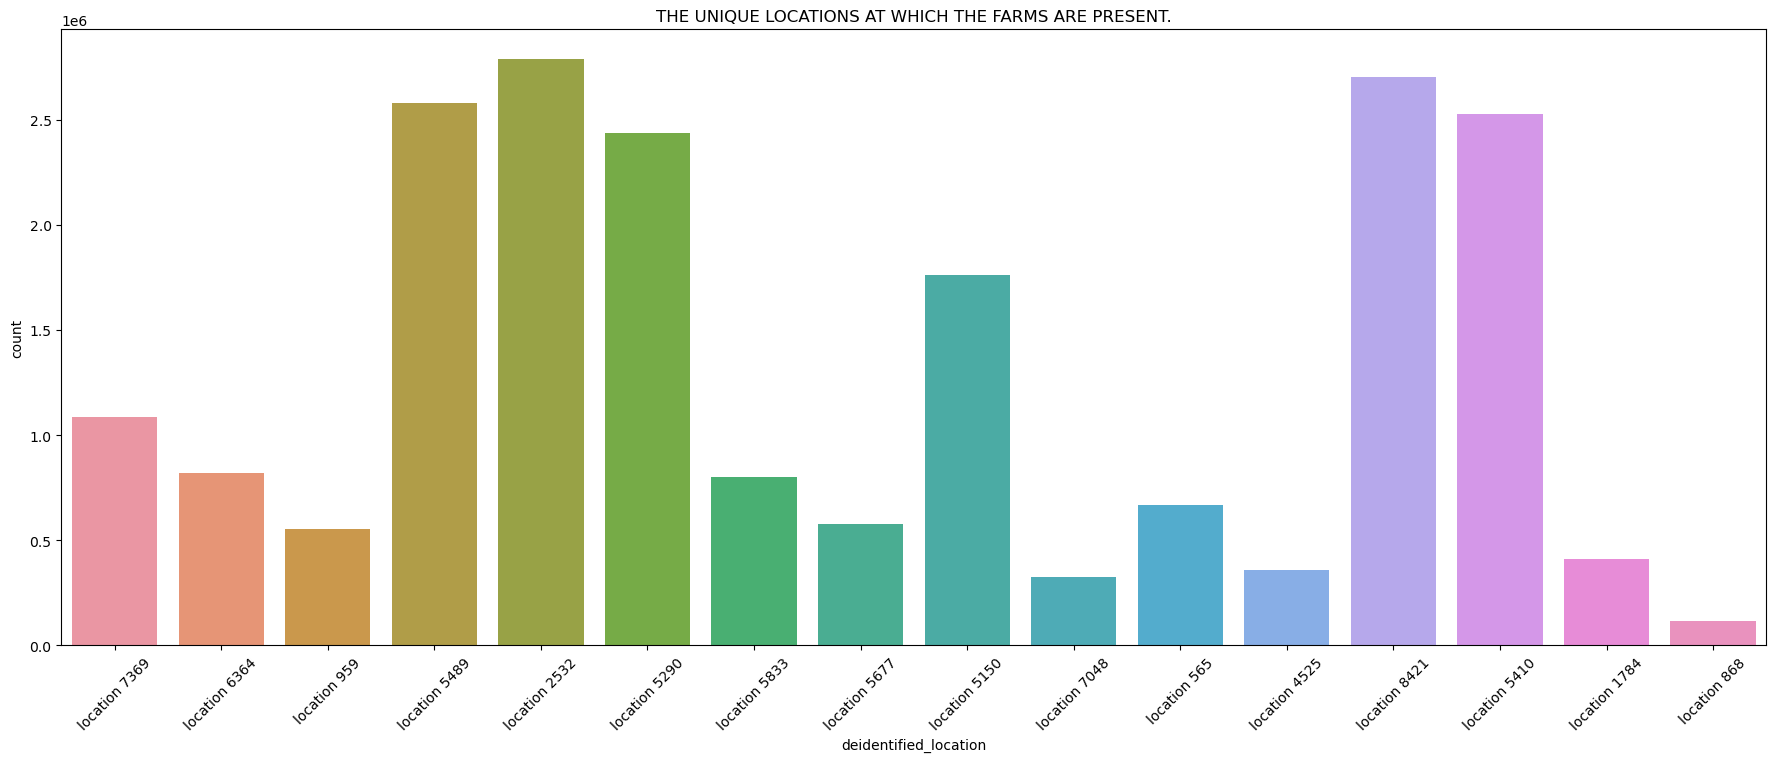

location 2532    2790470
location 8421    2702898
location 5489    2580531
location 5410    2525684
location 5290    2439148
location 5150    1760872
location 7369    1085446
location 6364     819731
location 5833     799257
location 565      667989
location 5677     575401
location 959      552034
location 1784     411313
location 4525     359642
location 7048     323623
location 868      117259
Name: deidentified_location, dtype: int64

In [155]:
#Count Plot to display the Unique locations
plt.figure(figsize=(22,8))
sns.countplot(x="deidentified_location", data= dataframe)
plt.title("THE UNIQUE LOCATIONS AT WHICH THE FARMS ARE PRESENT.")
plt.xticks(rotation = 45)
plt.show()

# Value count of unique locations
dataframe.deidentified_location.value_counts()

In [156]:
dataframe.isnull().sum()

date                     0
farm_id                  0
ingredient_type          0
yield                    0
farm_area                0
deidentified_location    0
temp_obs                 0
cloudiness               0
wind_direction           0
dew_temp                 0
pressure_sea_level       0
precipitation            0
wind_speed               0
dtype: int64

In [44]:
dataframe.ingredient_type.unique()

array(['ing_w', 'ing_x', 'ing_y', 'ing_z'], dtype=object)

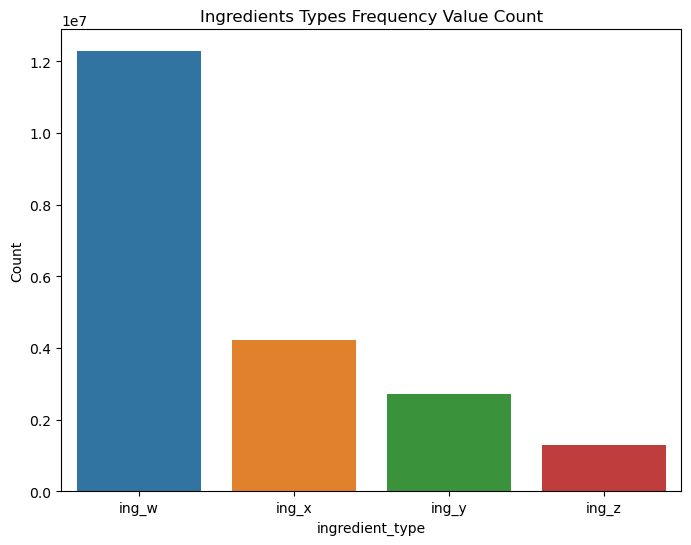

ing_w    59.819574
ing_x    20.642019
ing_y    13.260175
ing_z     6.278233
Name: ingredient_type, dtype: float64

In [45]:
#graphical analysis of ingridient type
plt.figure(figsize=(8,6))
plt.title("Ingredients Types Frequency Value Count")
sns.countplot(x="ingredient_type", data= dataframe)
plt.ylabel("Count")
plt.show()

#Unique value count of the ingredient_type column
dataframe.ingredient_type.value_counts(normalize = True)*100

In [25]:
#splitting the datetime
dataframe["year"]=dataframe["date"].apply(lambda x:np.int(x[0:4]))
dataframe["month"]=dataframe["date"].apply(lambda x:np.int(x[5:7]))
dataframe["day"]=dataframe["date"].apply(lambda x:np.int(x[8:10]))
dataframe["time"]=dataframe["date"].apply(lambda x:(x[11:19]))

In [26]:
dataframe.head()

,date,farm_id,ingredient_type,yield,farm_area,deidentified_location,temp_obs,cloudiness,wind_direction,dew_temp,pressure_sea_level,precipitation,wind_speed,year,month,day,time
0,2016-01-01 00:00:00,fid_110884,ing_w,0.0,690.455096,location 7369,25.0,6.0,0.0,20.0,1019.7,0.0,0.0,2016,1,1,00:00:00
1,2016-01-01 00:00:00,fid_90053,ing_w,0.0,252.696160,location 7369,25.0,6.0,0.0,20.0,1019.7,0.0,0.0,2016,1,1,00:00:00
2,2016-01-01 00:00:00,fid_17537,ing_w,0.0,499.446528,location 7369,25.0,6.0,0.0,20.0,1019.7,0.0,0.0,2016,1,1,00:00:00
3,2016-01-01 00:00:00,fid_110392,ing_w,0.0,2200.407555,location 7369,25.0,6.0,0.0,20.0,1019.7,0.0,0.0,2016,1,1,00:00:00
4,2016-01-01 00:00:00,fid_62402,ing_w,0.0,10833.140121,location 7369,25.0,6.0,0.0,20.0,1019.7,0.0,0.0,2016,1,1,00:00:00


In [27]:
dataframe=dataframe.drop(['date'],axis=1)

In [28]:
dataframe.tail()

,farm_id,ingredient_type,yield,farm_area,deidentified_location,temp_obs,cloudiness,wind_direction,dew_temp,pressure_sea_level,precipitation,wind_speed,year,month,day,time
20511293,fid_117010,ing_x,0.000,11857.395696,location 868,-17.1,2.0,60.0,-19.2,1022.7,0.0,2.6,2016,12,17,06:00:00
20511294,fid_117010,ing_z,246.516,11857.395696,location 868,-17.1,2.0,60.0,-19.2,1022.7,0.0,2.6,2016,12,17,06:00:00
20511295,fid_74945,ing_w,92.000,7561.375170,location 868,-17.1,2.0,60.0,-19.2,1022.7,0.0,2.6,2016,12,17,06:00:00
20511296,fid_74945,ing_x,0.000,7561.375170,location 868,-17.1,2.0,60.0,-19.2,1022.7,0.0,2.6,2016,12,17,06:00:00
20511297,fid_74945,ing_z,145.810,7561.375170,location 868,-17.1,2.0,60.0,-19.2,1022.7,0.0,2.6,2016,12,17,06:00:00


encoding

In [29]:
#onehot encoding
from sklearn import preprocessing
#from sklearn.preprocessing import oneHotEncoder
dataframe=pd.get_dummies(dataframe,columns=['ingredient_type','deidentified_location'],drop_first=True)
dataframe

,farm_id,yield,farm_area,temp_obs,cloudiness,wind_direction,dew_temp,pressure_sea_level,precipitation,wind_speed,...,deidentified_location_location 5489,deidentified_location_location 565,deidentified_location_location 5677,deidentified_location_location 5833,deidentified_location_location 6364,deidentified_location_location 7048,deidentified_location_location 7369,deidentified_location_location 8421,deidentified_location_location 868,deidentified_location_location 959
0,fid_110884,0.000,690.455096,25.0,6.0,0.0,20.0,1019.7,0.0,0.0,...,0,0,0,0,0,0,1,0,0,0
1,fid_90053,0.000,252.696160,25.0,6.0,0.0,20.0,1019.7,0.0,0.0,...,0,0,0,0,0,0,1,0,0,0
2,fid_17537,0.000,499.446528,25.0,6.0,0.0,20.0,1019.7,0.0,0.0,...,0,0,0,0,0,0,1,0,0,0
3,fid_110392,0.000,2200.407555,25.0,6.0,0.0,20.0,1019.7,0.0,0.0,...,0,0,0,0,0,0,1,0,0,0
4,fid_62402,0.000,10833.140121,25.0,6.0,0.0,20.0,1019.7,0.0,0.0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20511293,fid_117010,0.000,11857.395696,-17.1,2.0,60.0,-19.2,1022.7,0.0,2.6,...,0,0,0,0,0,0,0,0,1,0
20511294,fid_117010,246.516,11857.395696,-17.1,2.0,60.0,-19.2,1022.7,0.0,2.6,...,0,0,0,0,0,0,0,0,1,0
20511295,fid_74945,92.000,7561.375170,-17.1,2.0,60.0,-19.2,1022.7,0.0,2.6,...,0,0,0,0,0,0,0,0,1,0
20511296,fid_74945,0.000,7561.375170,-17.1,2.0,60.0,-19.2,1022.7,0.0,2.6,...,0,0,0,0,0,0,0,0,1,0


In [53]:
dataframe.columns

Index(['farm_id', 'yield', 'farm_area', 'temp_obs', 'cloudiness',
       'wind_direction', 'dew_temp', 'pressure_sea_level', 'precipitation',
       'wind_speed', 'year', 'month', 'day', 'time', 'ingredient_type_ing_x',
       'ingredient_type_ing_y', 'ingredient_type_ing_z',
       'deidentified_location_location 2532',
       'deidentified_location_location 4525',
       'deidentified_location_location 5150',
       'deidentified_location_location 5290',
       'deidentified_location_location 5410',
       'deidentified_location_location 5489',
       'deidentified_location_location 565',
       'deidentified_location_location 5677',
       'deidentified_location_location 5833',
       'deidentified_location_location 6364',
       'deidentified_location_location 7048',
       'deidentified_location_location 7369',
       'deidentified_location_location 8421',
       'deidentified_location_location 868',
       'deidentified_location_location 959'],
      dtype='object')

In [162]:
dataframe.isnull().sum()

farm_id                                0
yield                                  0
farm_area                              0
temp_obs                               0
cloudiness                             0
wind_direction                         0
dew_temp                               0
pressure_sea_level                     0
precipitation                          0
wind_speed                             0
year                                   0
month                                  0
day                                    0
time                                   0
ingredient_type_ing_x                  0
ingredient_type_ing_y                  0
ingredient_type_ing_z                  0
deidentified_location_location 2532    0
deidentified_location_location 4525    0
deidentified_location_location 5150    0
deidentified_location_location 5290    0
deidentified_location_location 5410    0
deidentified_location_location 5489    0
deidentified_location_location 565     0
deidentified_loc

In [30]:
dataframe.set_index('farm_id',inplace=True)
dataframe.tail()

,yield,farm_area,temp_obs,cloudiness,wind_direction,dew_temp,pressure_sea_level,precipitation,wind_speed,year,...,deidentified_location_location 5489,deidentified_location_location 565,deidentified_location_location 5677,deidentified_location_location 5833,deidentified_location_location 6364,deidentified_location_location 7048,deidentified_location_location 7369,deidentified_location_location 8421,deidentified_location_location 868,deidentified_location_location 959
farm_id,,,,,,,,,,,,,,,,,,,,,
fid_117010,0.000,11857.395696,-17.1,2.0,60.0,-19.2,1022.7,0.0,2.6,2016,...,0,0,0,0,0,0,0,0,1,0
fid_117010,246.516,11857.395696,-17.1,2.0,60.0,-19.2,1022.7,0.0,2.6,2016,...,0,0,0,0,0,0,0,0,1,0
fid_74945,92.000,7561.375170,-17.1,2.0,60.0,-19.2,1022.7,0.0,2.6,2016,...,0,0,0,0,0,0,0,0,1,0
fid_74945,0.000,7561.375170,-17.1,2.0,60.0,-19.2,1022.7,0.0,2.6,2016,...,0,0,0,0,0,0,0,0,1,0
fid_74945,145.810,7561.375170,-17.1,2.0,60.0,-19.2,1022.7,0.0,2.6,2016,...,0,0,0,0,0,0,0,0,1,0


In [31]:
dataframe.drop('time',axis=1,inplace=True)

In [32]:
#train test split
from sklearn.model_selection import train_test_split

In [33]:
y = dataframe['yield']
X = dataframe.loc[:, dataframe.columns != 'yield']

X_train, X_test, y_train, y_test =   train_test_split(X, y, test_size=0.20,random_state = 123)

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(16409038, 29) (4102260, 29)
(16409038,) (4102260,)


In [62]:
#linear regression
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)
X_train_pred=lr.predict(X_train)
X_test_pred=lr.predict(X_test)

In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
lr = LinearRegression()
lr.fit(X_train, y_train)

# make predictions on the testing data
y_pred = lr.predict(X_test)

# calculate the RMSE of the predictions
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print('RMSE: {:.2f}'.format(rmse))

RMSE: 156394.04


random forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
#from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)


# calculate the RMSE of the predictions
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print('RMSE: {:.2f}'.format(rmse))

sarimax

In [19]:
import statsmodels.api as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from matplotlib import pyplot as plt

# Convert the 'date' column to a datetime type
dataframe['date'] = pd.to_datetime(dataframe['date'])

# Set the split date
split_date = '2016-10-01'

# Split the data into a training set and a validation set
train_data = dataframe.loc[dataframe['date']<split_date]
valid_data = dataframe.loc[dataframe['date']>=split_date]

In [ ]:
import statsmodels.api as sm
# Determine parameters for SARIMA model
d = 1  # order of differencing
p = 1  # order of autoregression
q = 1  # order of moving average
D = 1  # order of seasonal differencing
P = 1  # order of seasonal autoregression
Q = 1  # order of seasonal moving average
s = 12  # seasonal period (e.g., 12 for monthly data)

# Fit SARIMA model to training data
sarima = sm.tsa.statespace.SARIMAX(dataframe['yield'], order=(p, d, q), seasonal_order=(P, D, Q, s))
fit_sarima= sarima.fit()

# Evaluate model on validation data using RMSE metric
y_true = valid_data['yield']
y_pred = fit_model.predict(start=valid_data.index[0], end=valid_data.index[-1])
rmse = ((y_pred - y_true) ** 2).mean() ** 0.5
print(f'RMSE: {rmse}')


building ARIMA model

In [3]:
train_data = pd.read_csv('/kaggle/input/data-set/train_data.csv')

In [3]:
train_data.shape

(20216100, 4)

In [5]:
train_data.head()

,date,farm_id,ingredient_type,yield
0,2016-01-01 00:00:00,fid_110884,ing_w,0.0
1,2016-01-01 00:00:00,fid_90053,ing_w,0.0
2,2016-01-01 00:00:00,fid_17537,ing_w,0.0
3,2016-01-01 00:00:00,fid_110392,ing_w,0.0
4,2016-01-01 00:00:00,fid_62402,ing_w,0.0


In [89]:
train_data.duplicated(subset=None, keep='first').sum()

117

In [90]:
train_data=train_data.drop_duplicates(subset=None, keep='first', inplace=False, ignore_index=False)

In [91]:
train_data.isnull().sum()

date               0
farm_id            0
ingredient_type    0
yield              0
dtype: int64

In [92]:
train_data.nunique(axis=0,dropna=False)

date                  8784
farm_id               1434
ingredient_type          4
yield              1688175
dtype: int64

In [4]:
#Convert the date column to datetime format and set it as the index:
train_data['date'] = pd.to_datetime(train_data['date'])
train_data.set_index('date', inplace=True)

In [5]:
# Group the data by farm_id and ingredient_type
grouped = train_data.groupby(['farm_id', 'ingredient_type'])

In [9]:
# Loop through each group and fit an ARIMA model
for name, group in grouped:
    # Get the farm_id and ingredient_type for the current group
    farm_id, ingredient_type = name

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# Create a new ARIMA model with p=1, d=1, and q=1
model = ARIMA(group['yield'], order=(1, 1, 1))
    
# Fit the model to the data
model_fit = model.fit()

# Fit an ARIMA model and make a one-year forecast for the current group
forecast_values = fit_arima(group)

In [114]:
 from sklearn.metrics import mean_squared_error
    # Make predictions for the next year
#predictions = model_fit.predict(start=group.index[-12], end=group.index[-1], typ='levels')
    
 # Calculate the RMSE for the predictions
rmse = np.sqrt(mean_squared_error(group['yield'].iloc[-12:], predictions))
# Add the RMSE to the list of RMSEs for each group
rmse_list=[]
rmse_list.append(rmse)
# Calculate the overall RMSE by taking the average of the RMSEs for each group
overall_rmse = np.mean(rmse_list)
print(f'Overall RMSE: {overall_rmse:.2f}')

Overall RMSE: 10.66


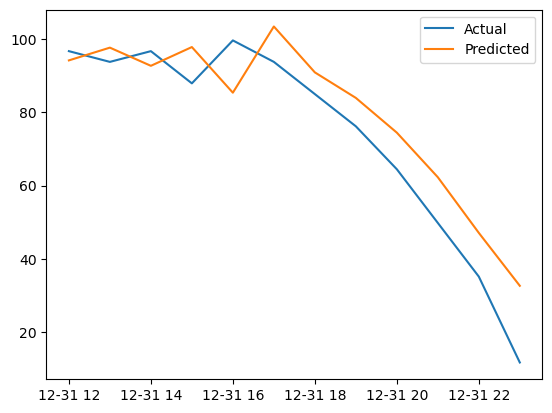

In [13]:
import matplotlib.pyplot as plt

# Plot actual vs predicted values
plt.plot(group['yield'].iloc[-12:], label='Actual')
plt.plot(predictions, label='Predicted')
plt.legend()
plt.show()

ARIMA model on test data

In [81]:
test_data = pd.read_csv('/kaggle/input/dataset/test_data-1664552867678.csv')

In [15]:
test_data.shape

(20848800, 4)

In [6]:
test_data.head()

,date,farm_id,ingredient_type,id
0,2017-01-01 00:00:00,fid_110884,ing_w,0
1,2017-01-01 00:00:00,fid_90053,ing_w,1
2,2017-01-01 00:00:00,fid_17537,ing_w,2
3,2017-01-01 00:00:00,fid_110392,ing_w,3
4,2017-01-01 00:00:00,fid_62402,ing_w,4


In [30]:
test_data.duplicated(subset=None, keep='first').sum()

0

In [94]:
test_data.isnull().sum()

date               0
farm_id            0
ingredient_type    0
id                 0
dtype: int64

In [31]:
test_data.nunique(axis=0,dropna=False)

date                   8760
farm_id                1434
ingredient_type           4
id                 20848800
dtype: int64

In [82]:
#Convert the date column to datetime format and set it as the index:
test_data['date'] = pd.to_datetime(test_data['date'])
test_data.set_index('date', inplace=True)

In [83]:
# Group the data by farm_id and ingredient_type
grouped = test_data.groupby(['farm_id', 'ingredient_type'])


In [115]:
# Define a function to fit and forecast an ARIMA model on each group
def fit_arima(train_data):
    # Fit an ARIMA model with order (1, 1, 1)
    model = ARIMA(train_data['yield'], order=(1, 1, 1))
    model_fit = model.fit()

In [116]:
# Make a one-year forecast
forecast_values = model_fit.forecast(steps=12)
# Return the forecasted values

  #return forecast_values

/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:843: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  data=self.data,


In [119]:
# Add the forecasted values to the test DataFrame
test_data['yield_pred'] = forecast_values

In [99]:
test_data.to_csv('prediction_results.csv')